Definition: Outliers are extreme values that differ significantly from other observations.

Causes: Data entry errors, natural variation, and unexpected behavior.

Effects: Outliers can skew analyses, distort model training, and reduce accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Boxplot: Highlights points outside the IQR-based whiskers.
    
Scatter Plot: Helps spot outliers in a two-variable context.

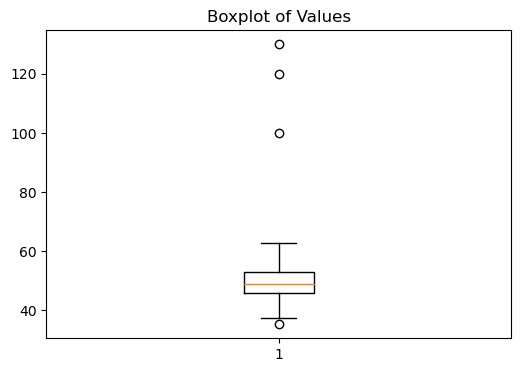

In [2]:
# Generate some example data
data = {'Value': np.concatenate((np.random.normal(50, 5, 100), [100, 120, 130]))}
df = pd.DataFrame(data)

# Boxplot to identify outliers
plt.figure(figsize=(6,4))
plt.boxplot(df['Value'])
plt.title("Boxplot of Values")
plt.show()

### Statistical Methods

Z-Score Method: Outliers if Z-score > 3 or < -3.
    
IQR Method: Outliers if values fall outside Q1 - 1.5*IQR and Q3 + 1.5*IQR.

In [3]:
# Z-score method
from scipy.stats import zscore
df['Z_Score'] = zscore(df['Value'])
outliers_z = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]
print("Outliers based on Z-score:\n", outliers_z)

Outliers based on Z-score:
      Value   Z_Score
100  100.0  3.887359
101  120.0  5.474552
102  130.0  6.268148


In [4]:
# IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR))]
print("Outliers based on IQR:\n", outliers_iqr)

Outliers based on IQR:
           Value   Z_Score
27    35.315944 -1.245944
100  100.000000  3.887359
101  120.000000  5.474552
102  130.000000  6.268148


### Treating Outliers

Removing Outliers: Useful when outliers are errors or extremely irrelevant.

In [5]:
# Removing outliers based on IQR method
df_cleaned = df[~((df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR)))]
print(df_cleaned)

        Value   Z_Score
0   43.715690 -0.579344
1   47.323489 -0.293030
2   47.727353 -0.260979
3   46.537297 -0.355422
4   56.054638  0.399871
..        ...       ...
95  38.487408 -0.994258
96  62.944969  0.946685
97  58.153330  0.566422
98  43.655543 -0.584117
99  44.336043 -0.530113

[99 rows x 2 columns]


Imputing Outliers:

Replace with median or mean.

Winsorization: Capping outliers to nearest non-outlier values.

In [6]:
# Replacing outliers with median
median_value = df['Value'].median()
df['Value_Imputed'] = np.where(df['Value'] > (Q3 + 1.5 * IQR), median_value, df['Value'])
print(df)

          Value   Z_Score  Value_Imputed
0     43.715690 -0.579344      43.715690
1     47.323489 -0.293030      47.323489
2     47.727353 -0.260979      47.727353
3     46.537297 -0.355422      46.537297
4     56.054638  0.399871      56.054638
..          ...       ...            ...
98    43.655543 -0.584117      43.655543
99    44.336043 -0.530113      44.336043
100  100.000000  3.887359      48.801068
101  120.000000  5.474552      48.801068
102  130.000000  6.268148      48.801068

[103 rows x 3 columns]


### Transforming Outliers

Log or square root transformations to reduce the effect of high values.

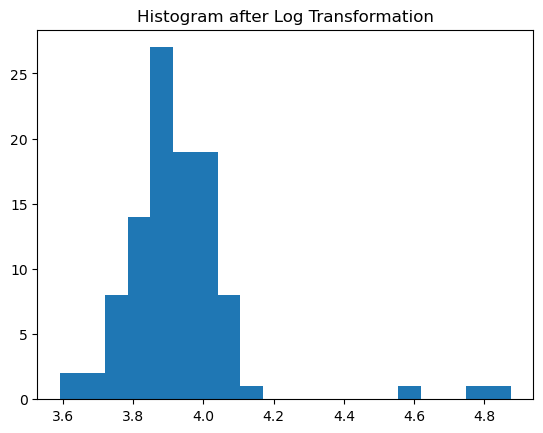

In [7]:
# Log transformation for skewed data
df['Log_Value'] = np.log(df['Value'] + 1)  # Adding 1 to avoid log(0)
plt.hist(df['Log_Value'], bins=20)
plt.title("Histogram after Log Transformation")
plt.show()

### Advanced Outlier Detection Techniques

Isolation Forest: Anomaly detection method that isolates observations by randomly selecting features and split values.

In [8]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)
df['Anomaly_Score'] = iso_forest.fit_predict(df[['Value']])
print("Isolation Forest outliers:\n", df[df['Anomaly_Score'] == -1])

Isolation Forest outliers:
           Value   Z_Score  Value_Imputed  Log_Value  Anomaly_Score
10    39.777049 -0.891913      39.777049   3.708119             -1
13    40.517017 -0.833189      40.517017   3.726103             -1
27    35.315944 -1.245944      35.315944   3.592257             -1
44    58.784666  0.616525      58.784666   4.090749             -1
90    37.295868 -1.088818      37.295868   3.645342             -1
95    38.487408 -0.994258      38.487408   3.675982             -1
96    62.944969  0.946685      62.944969   4.158023             -1
97    58.153330  0.566422      58.153330   4.080133             -1
100  100.000000  3.887359      48.801068   4.615121             -1
101  120.000000  5.474552      48.801068   4.795791             -1
102  130.000000  6.268148      48.801068   4.875197             -1


DBSCAN: Density-based clustering method for finding outliers in multi-dimensional data.

In [9]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(df[['Value']])
df['DBSCAN_Outlier'] = clustering.labels_
print("DBSCAN Outliers:\n", df[df['DBSCAN_Outlier'] == -1])

DBSCAN Outliers:
           Value   Z_Score  Value_Imputed  Log_Value  Anomaly_Score  \
96    62.944969  0.946685      62.944969   4.158023             -1   
100  100.000000  3.887359      48.801068   4.615121             -1   
101  120.000000  5.474552      48.801068   4.795791             -1   
102  130.000000  6.268148      48.801068   4.875197             -1   

     DBSCAN_Outlier  
96               -1  
100              -1  
101              -1  
102              -1  


Robust Scaler: Using a scaler that minimizes the impact of outliers, especially helpful for machine learning models.

In [10]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['Scaled_Value'] = scaler.fit_transform(df[['Value']])
print("Values after robust scaling:\n", df)

Values after robust scaling:
           Value   Z_Score  Value_Imputed  Log_Value  Anomaly_Score  \
0     43.715690 -0.579344      43.715690   3.800324              1   
1     47.323489 -0.293030      47.323489   3.877918              1   
2     47.727353 -0.260979      47.727353   3.886241              1   
3     46.537297 -0.355422      46.537297   3.861515              1   
4     56.054638  0.399871      56.054638   4.044009              1   
..          ...       ...            ...        ...            ...   
98    43.655543 -0.584117      43.655543   3.798978              1   
99    44.336043 -0.530113      44.336043   3.814102              1   
100  100.000000  3.887359      48.801068   4.615121             -1   
101  120.000000  5.474552      48.801068   4.795791             -1   
102  130.000000  6.268148      48.801068   4.875197             -1   

     DBSCAN_Outlier  Scaled_Value  
0                 0     -0.715317  
1                 0     -0.207839  
2                 0  